## Plot number of width observations

In [1]:
import os
import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
# Load the GLOW-S width with snow affected values removed 
output_path = '/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/ClimateRegionDivision/HUC_Parquet/allRegion_large_T273check_over60.parquet'
final_large_data_warm_over60 = pd.read_parquet(output_path)

# Remove all the rows with width less than 10m
final_large_data_warm_over60 = final_large_data_warm_over60[final_large_data_warm_over60['width']>10]

In [3]:
final_large_data_warm_over60

,riverID,date,width,lat,lon,sceneID_unique,COMID,month,date_YMD,hot_enough
2,R12084791XS2389944,2019-01-12 10:09:57,10.141748,-28.952676,27.725176,95295,12084791,1,2019-01-12,1.0
4,R12084791XS2389910,2019-02-06 10:50:10,21.861701,-28.965000,27.723562,95361,12084791,2,2019-02-06,1.0
5,R12084791XS2389911,2019-02-06 10:50:10,26.926238,-28.965000,27.722958,95361,12084791,2,2019-02-06,1.0
6,R12084791XS2389912,2019-02-06 10:50:10,26.998717,-28.965000,27.722354,95361,12084791,2,2019-02-06,1.0
7,R12084791XS2389913,2019-02-06 10:50:10,22.955775,-28.965000,27.721750,95361,12084791,2,2019-02-06,1.0
...,...,...,...,...,...,...,...,...,...,...
1400714999,R78027927XS0147569,2022-12-06 21:50:59,21.162842,42.185966,-124.134868,33475,78027927,12,2022-12-06,1.0
1400715000,R78027927XS0147569,2022-12-06 21:50:59,22.856135,42.185966,-124.134868,33477,78027927,12,2022-12-06,1.0
1400715001,R78027927XS0147569,2022-12-13 22:25:00,82.885030,42.185966,-124.134868,33484,78027927,12,2022-12-13,1.0
1400715002,R78027927XS0147570,2022-12-13 22:25:00,34.744213,42.186366,-124.134467,33484,78027927,12,2022-12-13,1.0


In [4]:
base_dir = "/N/lustre/project/proj-212/Dongmei/MERIT_Hydro/"
shapefiles = [f"riv_pfaf_{i}_MERIT_Hydro_v07_Basins_v01.shp" for i in range(1, 9)]
merged_line_gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(os.path.join(base_dir, shp)) for shp in shapefiles], ignore_index=True))

In [5]:
merged_line_gdf.head(3)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,...,Hylak_id,Lake_area,Grand_id,geometry,lon,lat,mwidth_mea,mwidth_max,gwidth_mea,gwidth_max
0,11000001,2.855143,2.405045,1.187148,0.002626,3017.867167,4,7.5,0.002626,0,...,-1.0,-1.0,-1.0,"LINESTRING (32.345 29.60167, 32.34417 29.60167...",NaN,NaN,NaN,NaN,NaN,NaN
1,11000002,1.113281,0.913670,1.218472,0.001618,2968.447721,4,1.8,0.001618,11000001,...,-1.0,-1.0,-1.0,"LINESTRING (32.32167 29.60917, 32.32083 29.609...",NaN,NaN,NaN,NaN,NaN,NaN
2,11000003,6.131665,4.567923,1.342331,0.004619,2910.662400,4,28.3,0.004619,11000002,...,-1.0,-1.0,-1.0,"LINESTRING (32.31417 29.61417, 32.31417 29.615...",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Compute number of unique reaches for each river order type
unique_COMIDs = final_large_data_warm_over60['COMID'].unique()

# extract COMIDs for each COMID
order = merged_line_gdf[merged_line_gdf['COMID'].isin(unique_COMIDs)]

order = order[['COMID', 'order']]

order_mod = order.copy()
order_mod['order_grouped'] = order_mod['order'].apply(lambda x: '≥8' if x >= 8 else str(x))

order_counts = order_mod.groupby('order_grouped')['COMID'].nunique()

In [7]:
order

,COMID,order
53,11000054,1
301,11000302,3
307,11000308,2
308,11000309,3
765,11000766,1
...,...,...
2895863,86007242,1
2895875,86007254,1
2895879,86007258,1
2895888,86007267,2


In [8]:
order_counts

order_grouped
1     156563
2      89864
3      69491
4      75507
5      49757
6      23386
7       8574
≥8      3090
Name: COMID, dtype: int64

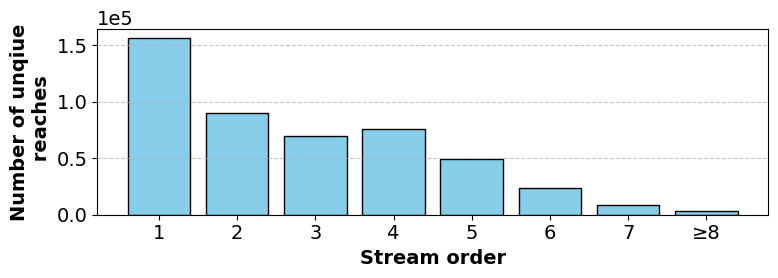

In [9]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

plt.figure(figsize=(8, 3))
plt.bar(order_counts.index.astype(str), order_counts.values, color='skyblue', edgecolor='black')

plt.xlabel('Stream order', fontweight='bold')
plt.ylabel('Number of unqiue\n reaches', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))

plt.tight_layout()
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/number_reaches_vs_order.tiff', dpi=600)
plt.show()

In [10]:
# Number of observations for each COMID
comid_counts = final_large_data_warm_over60.groupby('COMID').size().reset_index(name='count')

In [11]:
# extrcat river order to each COMID
comid_counts_with_order = comid_counts.merge(merged_line_gdf[['COMID', 'order']], on='COMID', how='left')

In [12]:
order_mod = comid_counts_with_order
order_mod['order_grouped'] = order_mod['order'].apply(lambda x: '≥8' if x >= 8 else str(x))
order_counts_obs = order_mod.groupby('order_grouped')['count'].sum()

In [13]:
order_mod

,COMID,count,order,order_grouped
0,11000054,674,1,1
1,11000302,1528,3,3
2,11000308,685,2,2
3,11000309,2745,3,3
4,11000766,2568,1,1
...,...,...,...,...
476227,86007242,400,1,1
476228,86007254,3686,1,1
476229,86007258,6585,1,1
476230,86007267,1482,2,2


In [14]:
order_counts_obs

order_grouped
1     209186231
2     164712666
3     206262774
4     319829731
5     255149409
6     119856001
7      41871409
≥8     16791962
Name: count, dtype: int64

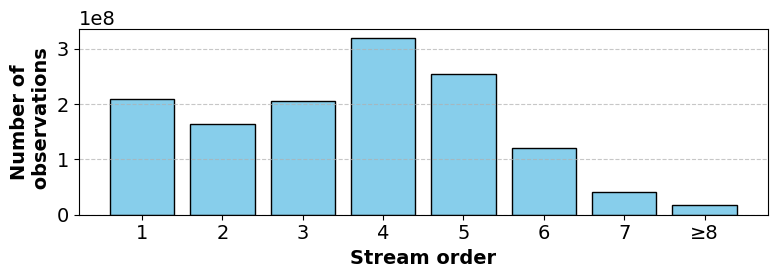

In [15]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

plt.figure(figsize=(8, 3))
plt.bar(order_counts_obs.index.astype(str), order_counts_obs.values, color='skyblue', edgecolor='black')

plt.xlabel('Stream order', fontweight='bold')
plt.ylabel('Number of\n observations', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/number_observations_vs_order.tiff', dpi=600)
plt.show()

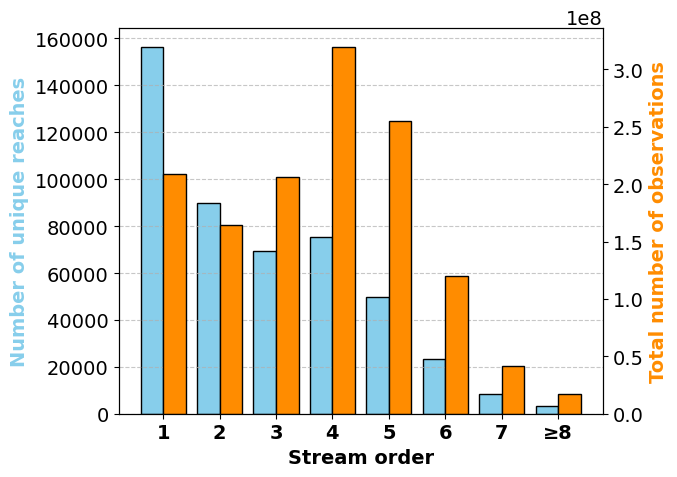

In [16]:
# Combine two bar plots into one

# Prepare data
labels = order_counts.index.astype(str)
x = np.arange(len(labels))
width = 0.4

# Set up the figure and both axes
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

fig, ax1 = plt.subplots(figsize=(7, 5))
ax2 = ax1.twinx()

# Plot the first series on the primary y-axis
bars1 = ax1.bar(x - width/2, order_counts.values, width=width, color='skyblue', edgecolor='black', label='All COMIDs')

# Plot the second series on the secondary y-axis
bars2 = ax2.bar(x + width/2, order_counts_obs.values, width=width, color='darkorange', edgecolor='black', label='Observed COMIDs')

# Set x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(labels, fontweight='bold')

# Set axis labels
ax1.set_ylabel('Number of unique reaches', color='skyblue', fontweight='bold')
ax2.set_ylabel('Total number of observations', color='darkorange', fontweight='bold')
ax1.set_xlabel('Stream order', fontweight='bold')

# Format grid and layout
ax1.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

# Combine legends manually
lines = [bars1, bars2]
labels = [bar.get_label() for bar in lines]

plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/number_reaches_observations_vs_order.tiff', dpi=600)
plt.show()

In [17]:
# Plot number of observations against different latitude bins
# Step 1: Create 5° latitude bins from -60 to 90
lat_bins = pd.cut(final_large_data_warm_over60['lat'], bins=np.arange(-60, 95, 5))

# Step 2: Count number of rows per bin
lat_counts = final_large_data_warm_over60.groupby(lat_bins).size()

/tmp/ipykernel_3662448/2566695873.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lat_counts = final_large_data_warm_over60.groupby(lat_bins).size()


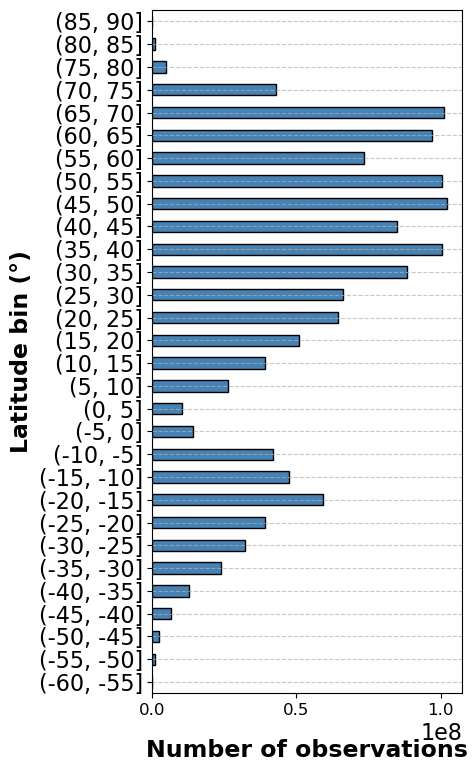

In [18]:
# Step 3: Plot with interval labels
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 16

plt.figure(figsize=(5, 8))
lat_counts.plot(kind='barh', color='steelblue', edgecolor='black')

# Formatting
plt.ylabel('Latitude bin (°)', fontweight='bold', fontsize=17)
plt.xlabel('Number of observations', fontweight='bold', labelpad=15, fontsize=17)

# Use interval strings for x-axis labels
plt.yticks(ticks=range(len(lat_counts)), labels=[str(interval) for interval in lat_counts.index], rotation=0, fontsize=16)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('/N/lustre/project/proj-212/abhinav/River_Width_analysis/RiverWidthAnalysis/Final_Figures/number_observations_vs_latitude.tiff', dpi=600)
plt.show()

/tmp/ipykernel_3662448/1753921820.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted_bins, patch_artist=True, boxprops=dict(facecolor='#5d7abc', color='black'),


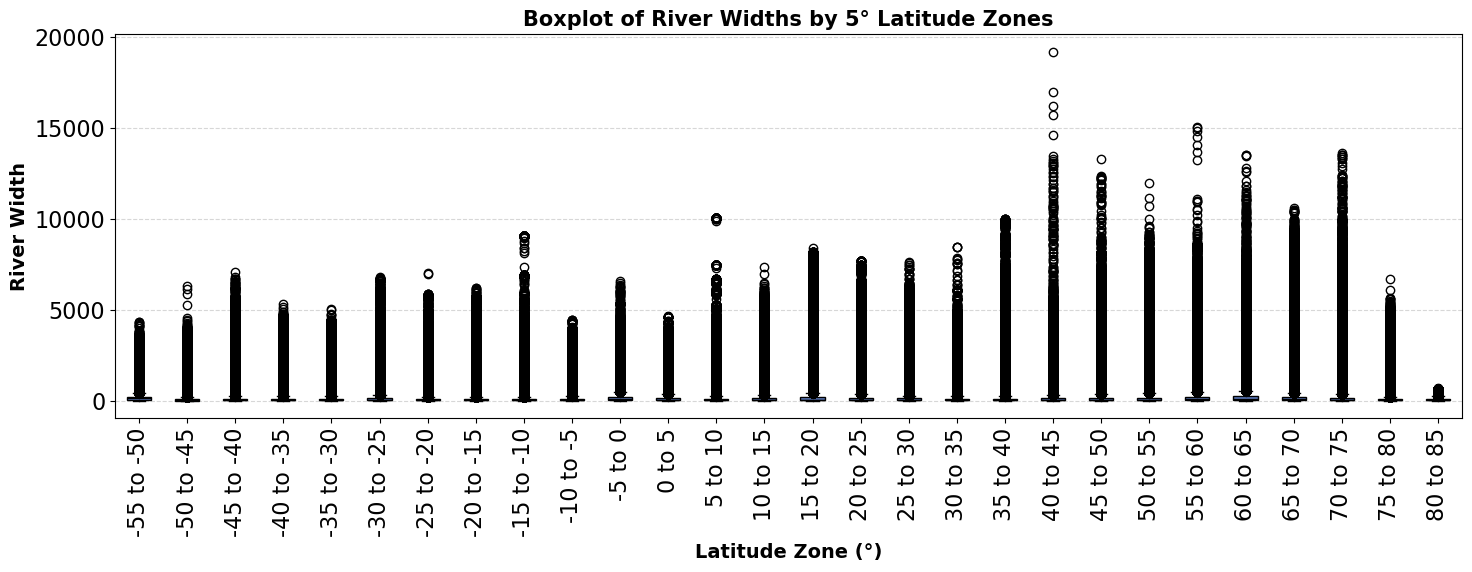

In [19]:
# Plot width boxplots for different latitude zones

lat_bins = np.arange(-60, 95, 5)  # [−60, −55, ..., 90]
lat_labels = [f"{lat_bins[i]} to {lat_bins[i+1]}" for i in range(len(lat_bins)-1)]

# Bin the latitudes
final_large_data_warm_over60['lat_bin'] = pd.cut(final_large_data_warm_over60['lat'], bins=lat_bins, labels=lat_labels, include_lowest=True)

# Drop rows with NaN lat_bin or width
plot_data = final_large_data_warm_over60.dropna(subset=['lat_bin', 'width'])

# Sort bins for consistent plotting
sorted_bins = sorted(plot_data['lat_bin'].unique(), key=lambda x: float(x.split()[0]))

# Prepare data for plotting
data_to_plot = [plot_data[plot_data['lat_bin'] == bin_label]['width'] for bin_label in sorted_bins]

/tmp/ipykernel_3662448/4202861016.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted_bins, patch_artist=True, boxprops=dict(facecolor='#5d7abc', color='black'),


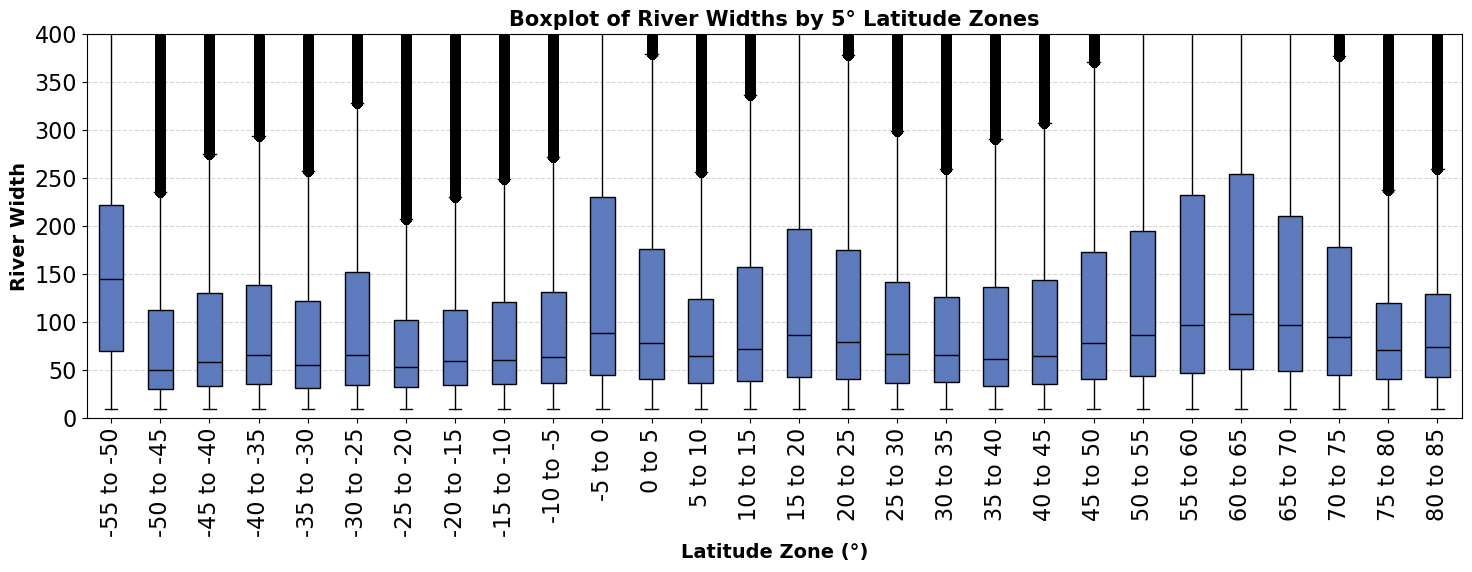

In [22]:
# Plotting
plt.figure(figsize=(15, 6))
plt.boxplot(data_to_plot, labels=sorted_bins, patch_artist=True, boxprops=dict(facecolor='#5d7abc', color='black'),
            medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'))
plt.ylim(0, 400)
plt.xticks(rotation=90)
plt.xlabel("Latitude Zone (°)", fontsize=14, fontweight='bold')
plt.ylabel("River Width", fontsize=14, fontweight='bold')
plt.title("Boxplot of River Widths by 5° Latitude Zones", fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()